<a href="https://colab.research.google.com/github/TyronSamaroo/GoogleMLRecipies/blob/main/MachineLearningRecipes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Recipes  #1

In [ ]:
import sklearn

## Training Data

In [ ]:
 features = [[140, "smooth"], [130, "smooth"], [150, "bumpy"], [170, "bumpy"]]
 labels = ["apple", "apple", "orange", "orange"]

To make like easier change feature to 1 meaning smooth and 0 meaning bumpy. The first feature represent the weight. Also for lables 0 meanig apple and 1 meaning oranage

In [ ]:
 features = [[140, 1], [130, 1], [150, 0], [170, 0]]
 labels = [0, 0, 1, 1]

# Classifier: Decision Tree

Think of this classifier as a box of rules. Input and Output type are the same. It is now a empty box of rules. To train it we need a learning algorithm.

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

# Training Algorithm

The training algorithm is included in sklearn classifier object and it is called fit. Think of fit as "find patterns in data"

In [ ]:
clf = clf.fit(features, labels)

# Test

In [ ]:
#Default Predict method in classifier object
clf.predict([[150, 1]])

array([1])

In [ ]:
def prediction(data):
    prediction = clf.predict(data) 
    for value in prediction:
        if value == 1:
            print("Prediction: Orange")
        else:
            print("Prediction: Apple")

In [ ]:
prediction([[150,1]])

Prediction: Orange


In [ ]:
prediction(features)

Prediction: Apple
Prediction: Apple
Prediction: Orange
Prediction: Orange


# Machine Learning Recipes  #2

Goal: Use the Iris dataset to train a classifier and predict label for a new flower. 

# Import Data

Conveniently available in sklearn

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
iris.target[0]

0

In [ ]:
def view_data(num = 1):
    for i in range(0,num):
        print("Input: ", iris.data[i], "Output: ", iris.target[i])


In [ ]:
view_data(2)

Input:  [5.1 3.5 1.4 0.2] Output:  0
Input:  [4.9 3.  1.4 0.2] Output:  0


# Testing and Training Data

For this example remove one example of each flower. The data set is ordered so the first setosa is at 0, first versicolor at 50, and first virginca at 100. 

Below we are removing these 3 data points from target and data. 



1.   Training will have all but those 3 data points
2.   Testing will have the 3 removed data points


In [ ]:
import numpy as np
test_index = [0, 50, 100]

#training data
train_target = np.delete(iris.target, test_index)
train_data = np.delete(iris.data, test_index, axis= 0)

#testing data
test_target = iris.target[test_index]
test_data = iris.data[test_index]


## Choose and Train Classifer 

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)    

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Prediction

In [ ]:
test_target

array([0, 1, 2])

In [ ]:
clf.predict(test_data)

array([0, 1, 2])

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [49, 49, 49]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 98\nvalue = [0, 49, 49]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.171\nsamples = 53\nvalue = [0, 48, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.042\nsamples = 47\nvalue = [0, 46, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.523076

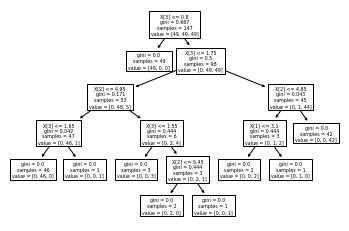

In [ ]:
 tree.plot_tree(clf)


In [ ]:
tree.export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 0.8\\ngini = 0.667\\nsamples = 147\\nvalue = [49, 49, 49]"] ;\n1 [label="gini = 0.0\\nsamples = 49\\nvalue = [49, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 1.75\\ngini = 0.5\\nsamples = 98\\nvalue = [0, 49, 49]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= 4.95\\ngini = 0.171\\nsamples = 53\\nvalue = [0, 48, 5]"] ;\n2 -> 3 ;\n4 [label="X[3] <= 1.65\\ngini = 0.042\\nsamples = 47\\nvalue = [0, 46, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 46\\nvalue = [0, 46, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="X[3] <= 1.55\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n7 -> 8 ;\n9 [label="X[2] <= 5.45\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 